# Практическая работа 8. Основы обучаемых алгоритмов

ФИО: **Мухамеджанов Ильнур Тимурович**

Группа: **ПИН-б-о-22-1**

## Задание, Вариант 16

Необходимо выполнить `визуализацию данных`,
хранящихся в файле с использованием библиотеки `matplotlib`. Необходимо обучить
модель `регрессии` и найти `значения параметров`, а также `визуализировать факт`, что
ваша модель хорошо `интерпретирует эмпирические данные`. Необходимо провести
`эксперименты` со следующими параметрами: `скорость обучения`, `начальные
значения параметров`. Определите их `влияние` на процесс обучения алгоритма

## Обозначение функций, `визуальзация данных`, обучение модели `регрессии` и `эксперименты`

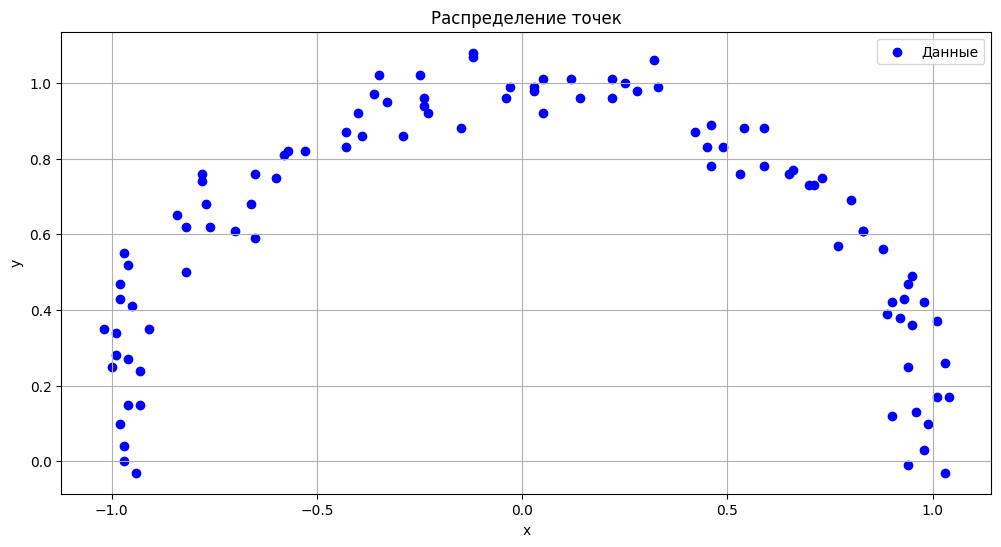

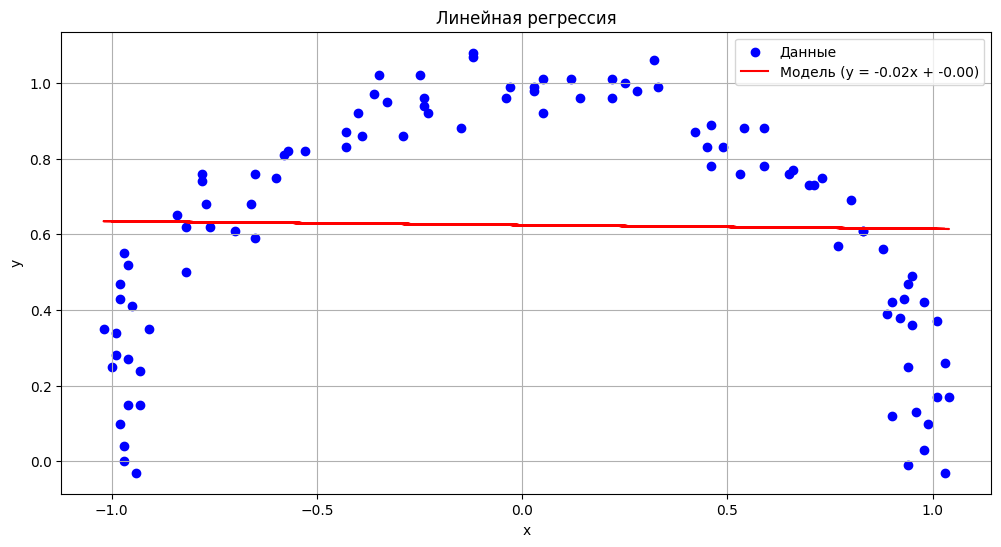

Параметры модели: наклон = -0.02, пересечение = -0.00


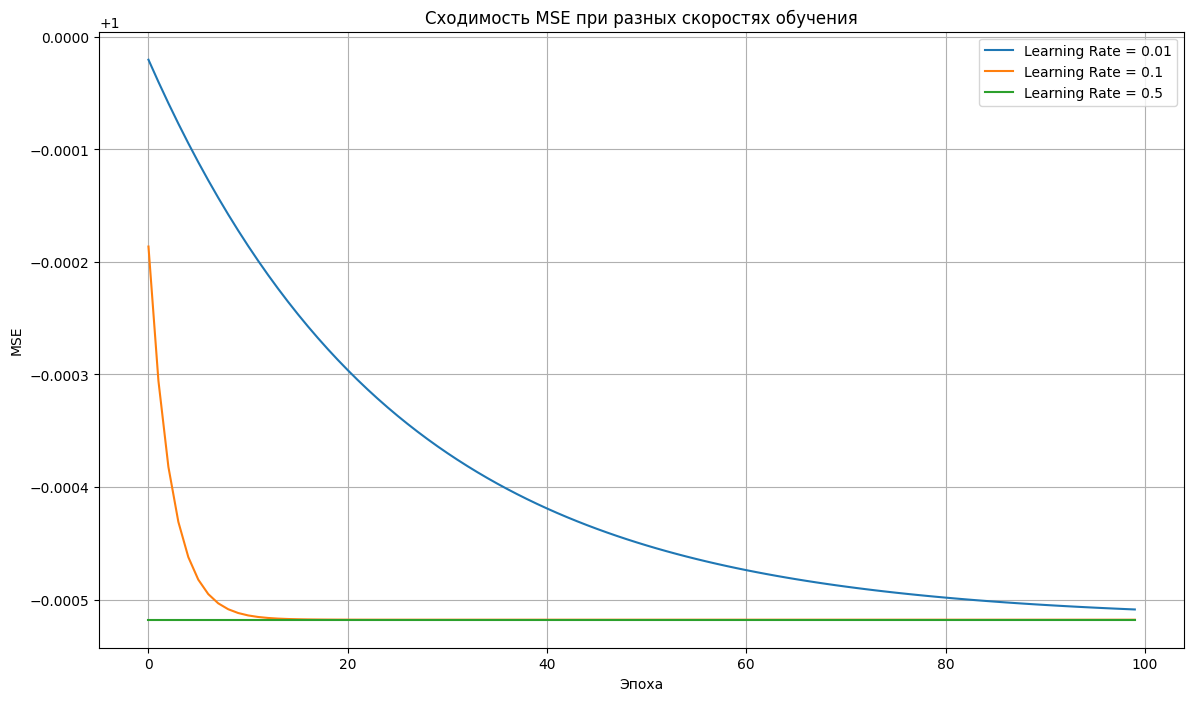

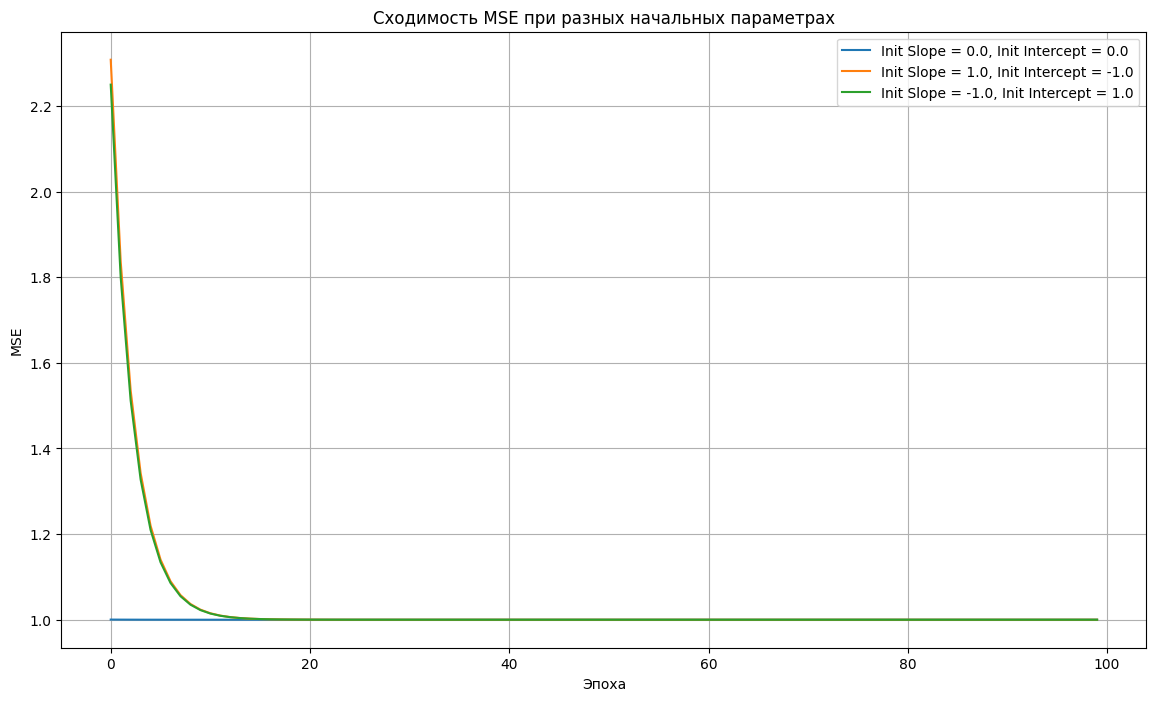

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла
file_path = 'pr8_16.txt'
data = np.loadtxt(file_path)
x = data[:, 0]  # Координаты X
y = data[:, 1]  # Координаты Y

# Нормализация данных для улучшения сходимости
x_norm = (x - np.mean(x)) / np.std(x)
y_norm = (y - np.mean(y)) / np.std(y)

# Функция для вычисления MSE (среднеквадратичная ошибка)
def compute_mse(slope, intercept, x, y):
    predictions = slope * x + intercept
    return np.mean((predictions - y) ** 2)

# Реализация градиентного спуска
def gradient_descent(x, y, learning_rate, epochs, initial_slope, initial_intercept):
    slope = initial_slope
    intercept = initial_intercept
    mse_history = []

    for epoch in range(epochs):
        # Предсказания модели
        predictions = slope * x + intercept

        # Градиенты
        slope_gradient = -2 * np.mean((y - predictions) * x)
        intercept_gradient = -2 * np.mean(y - predictions)

        # Обновление параметров
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient

        # Запись ошибки для анализа
        mse = compute_mse(slope, intercept, x, y)
        mse_history.append(mse)

    return slope, intercept, mse_history

# Визуализация исходных данных
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Данные')
plt.title('Распределение точек')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Обучение модели линейной регрессии
learning_rate = 0.1
initial_slope = 0.0
initial_intercept = 0.0
epochs = 100
slope, intercept, mse_history = gradient_descent(x_norm, y_norm, learning_rate, epochs, initial_slope, initial_intercept)

# Предсказания на основе найденных параметров
y_pred = slope * x_norm + intercept

# Визуализация модели и данных
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, y_pred * np.std(y) + np.mean(y), color='red', label=f'Модель (y = {slope:.2f}x + {intercept:.2f})')
plt.title('Линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Вывод параметров модели
print(f'Параметры модели: наклон = {slope:.2f}, пересечение = {intercept:.2f}')

# Эксперименты с разными скоростями обучения
learning_rates = [0.01, 0.1, 0.5]
plt.figure(figsize=(14, 8))

for lr in learning_rates:
    slope, intercept, mse_history = gradient_descent(
        x_norm, y_norm, lr, epochs, initial_slope, initial_intercept
    )
    plt.plot(mse_history, label=f'Learning Rate = {lr}')

plt.title('Сходимость MSE при разных скоростях обучения')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

# Эксперименты с разными начальными параметрами
initial_params = [(0.0, 0.0), (1.0, -1.0), (-1.0, 1.0)]
plt.figure(figsize=(14, 8))

for initial_slope, initial_intercept in initial_params:
    slope, intercept, mse_history = gradient_descent(
        x_norm, y_norm, learning_rate, epochs, initial_slope, initial_intercept
    )
    plt.plot(mse_history, label=f'Init Slope = {initial_slope}, Init Intercept = {initial_intercept}')

plt.title('Сходимость MSE при разных начальных параметрах')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()


В данной работе были использованы библиотеки `numpy, matplotlib` и модуль `pyplot` для обучения алгоритма линейной регресии

1. **Действительно ли алгоритмы могут обучаться? В чем заключается процесс обучения?**  
- Да, алгоритмы могут "обучаться", но обучение заключается в нахождении оптимальных параметров модели, которые минимизируют ошибку предсказаний.  
- **Процесс обучения:**  
  - Сбор данных.  
  - Разделение данных на тренировочные и тестовые выборки.  
  - Определение модели (например, линейная регрессия).  
  - Оптимизация параметров модели (например, с использованием градиентного спуска).  
  - Оценка качества модели на тестовых данных.  

2. **Что такое модель линейной регрессии?**  
- **Линейная регрессия** — это модель машинного обучения, используемая для нахождения линейной зависимости между входными (независимыми) переменными \(X\) и целевой (зависимой) переменной \(Y\).  
- Формула модели:  
  \[
  y = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b
  \]  
  где \(w_i\) — веса (коэффициенты), \(b\) — смещение (bias).  
- Используется для задач прогнозирования и анализа зависимости.  

3. **Каким образом производится подбор параметров модели в процессе градиентного спуска?**  
- **Градиентный спуск** — это итеративный метод оптимизации, используемый для минимизации функции ошибки (например, MSE).  
  - На каждом шаге алгоритм вычисляет градиент функции ошибки по параметрам \(w_i\).  
  - Параметры обновляются в направлении противоположном градиенту:  
    \[
    w_i = w_i - \eta \cdot \frac{\partial L}{\partial w_i}
    \]  
    где \(\eta\) — темп обучения, \(L\) — функция ошибки.  
  - Цель — минимизировать \(L\) за минимальное количество итераций.  

4. **Что такое темп обучения? Как влияет данный гиперпараметр на процесс обучения?**  
- **Темп обучения (\(\eta\))** — это гиперпараметр, определяющий размер шага при обновлении параметров модели в процессе градиентного спуска.  
  - Если \(\eta\) слишком мал:  
    - Процесс обучения будет медленным.  
    - Модель может застрять в локальном минимуме.  
  - Если \(\eta\) слишком велик:  
    - Модель может "перепрыгивать" через оптимум.  
    - Возможна неустойчивость и дивергенция.  

5. **Основные типы диаграмм Matplotlib и функции для их построения:**  
- **Линейный график (`plot`)**:  
  Для отображения зависимостей.  
  ```python
  plt.plot([1, 2, 3], [4, 5, 6])
  plt.show()
  ```  

- **Гистограмма (`hist`)**:  
  Для отображения распределения данных.  
  ```python
  plt.hist([1, 2, 2, 3, 3, 3, 4], bins=4)
  plt.show()
  ```

- **Диаграмма разброса (`scatter`)**:  
  Для отображения точек данных.  
  ```python
  plt.scatter([1, 2, 3], [4, 5, 6])
  plt.show()
  ```

- **Круговая диаграмма (`pie`)**:  
  Для отображения пропорций.  
  ```python
  plt.pie([15, 30, 45, 10], labels=['A', 'B', 'C', 'D'])
  plt.show()
  ```

- **Столбчатая диаграмма (`bar`)**:  
  Для сравнения величин.  
  ```python
  plt.bar(['A', 'B', 'C'], [10, 20, 15])
  plt.show()
  ```